# Final Assignment - Machine Learning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents.

1. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** (in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)

In [31]:
# Load the data into a pd Dataframe named 'happy'
happy = pd.read_csv('C:\\Users\\Manuel\\OneDrive - Axxam S.p.A\\Documenti\\Data Analytics\\Projects\\05_Final Assignment_ML and Web scraping\\data\\world_happiness.csv')
happy.sample(5)

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
58,Hungary,51.0,138.0,140.0,100.0,29600,77.2,94
41,Slovenia,14.0,13.0,97.0,54.0,33700,81.4,112
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
19,Czech Republic,24.0,58.0,121.0,117.0,34100,79.5,136
22,Mexico,67.0,71.0,87.0,120.0,18000,75.6,133


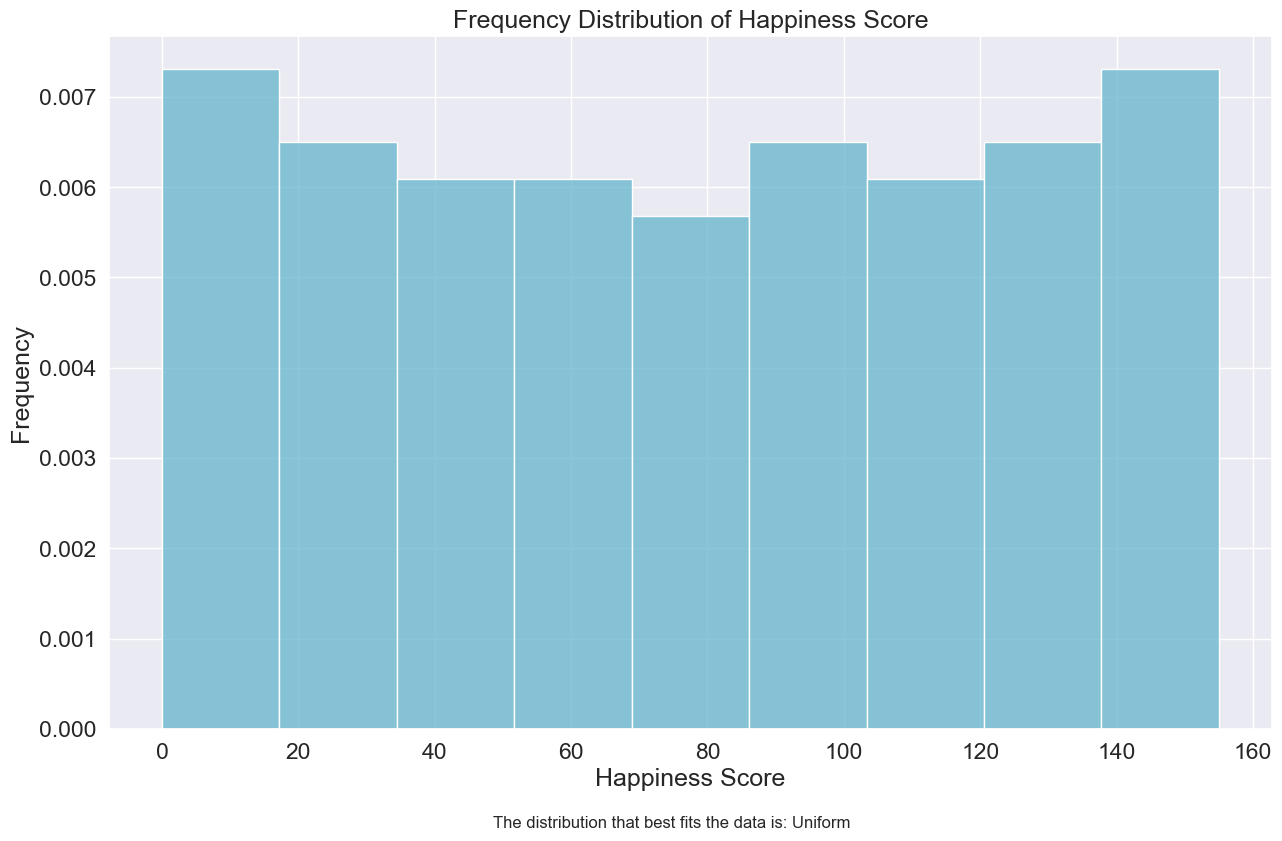

In [4]:
# Visualize 'happiness_score' distrivution with seaborn
sns.histplot(data = happy, x = 'happiness_score', stat = 'density', color = 'c')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Happiness Score')
plt.figtext(0.5, 0, "The distribution that best fits the data is: Uniform", ha = "center", fontsize = 12)
plt.show()



2. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?**

<Axes: >

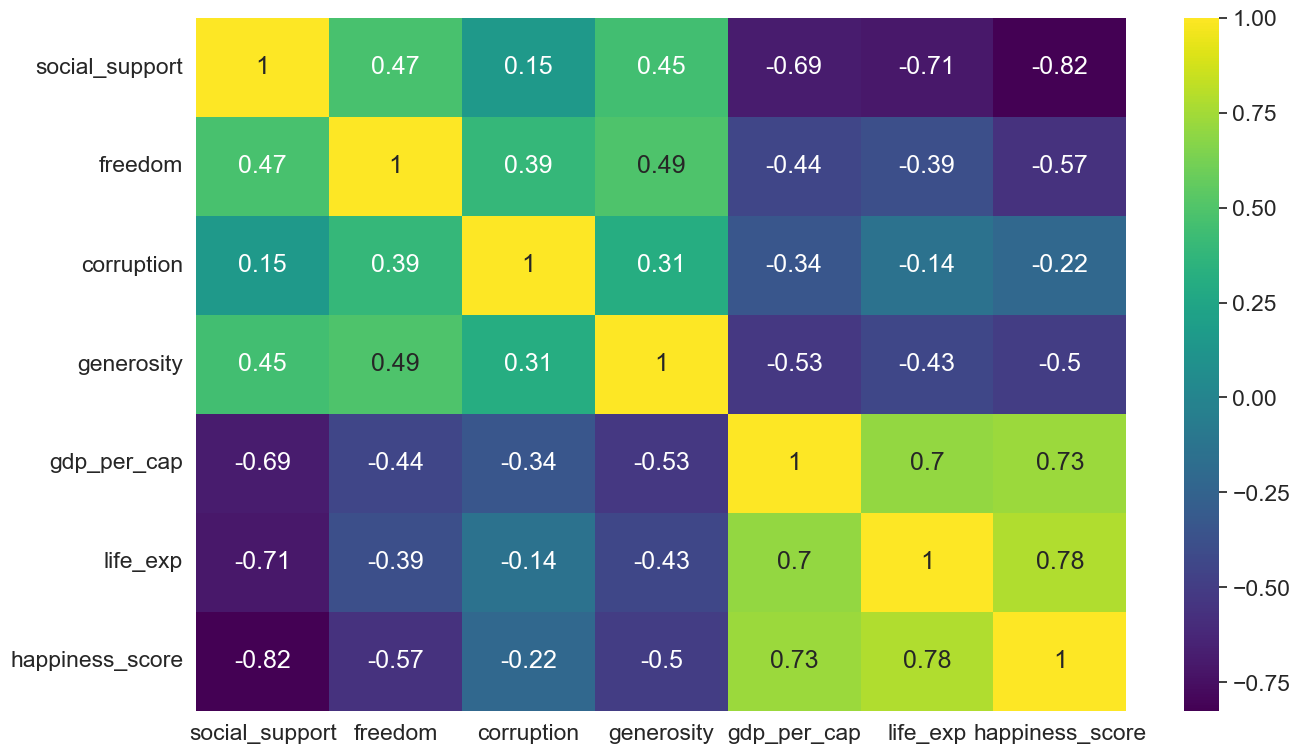

In [5]:
# Remove the column 'country', which is not numeric
happy_c = happy.drop(columns = ['country'])
# Plot the correlation matrix as a heatmap using seaborn
sns.heatmap(happy_c.corr(), annot = True, cmap = 'viridis')

In [6]:
least = abs(happy_c.corr()['happiness_score']).sort_values(ascending = True)
print(f"The least correlated variable to the 'happiness_score' is → {least.index[0]}: {least.iloc[0]:.3f}")

The least correlated variable to the 'happiness_score' is → corruption: 0.215


3. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*.

In [ ]:
# Calculating how many countries have a missing corruption value
len(happy[happy.corruption.isna()])

8

In [32]:
# Verify which columns have null values:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


In [ ]:
# Replace all missing values in all columns of the DataFrame with the respective column's mean value

# for each column name in the list of column containing null values
for c in happy.columns[1:5]: 
    # replace the null values in the current column with the column's mean value rounded to 1 decimal
    happy[c] = happy[c].fillna(round(happy[c].mean(), 1)) 
# Verify that all columns have the same number of non-null values:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   143 non-null    float64
 2   freedom          143 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       143 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


4. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**.

In [35]:
# Import the statsmodels package
import statsmodels.api as sm

# Define the y and X representing the target and the predictor variables
y = happy.happiness_score
X = happy.life_exp
# manually add a constant to the model
X = sm.add_constant(data = X)
# define the OLS (Ordinary Least Squares) model
model = sm.OLS(endog=y, exog=X)
# fit the regression line to our data
results = model.fit()
# get a summary of the model's statistics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           1.59e-30
Time:                        14:59:04   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Calculate how many points of the happiness_score will increase for a 1-year increase in life_expectancy
print(f'For each 1-year increase in the life_expectancy variable (X), the happiness_score (y) will increase by {results.params.life_exp:.1f} points')

For each 1-year increase in the life_expectancy variable (X), the happiness_score (y) will increase by 5.1 points


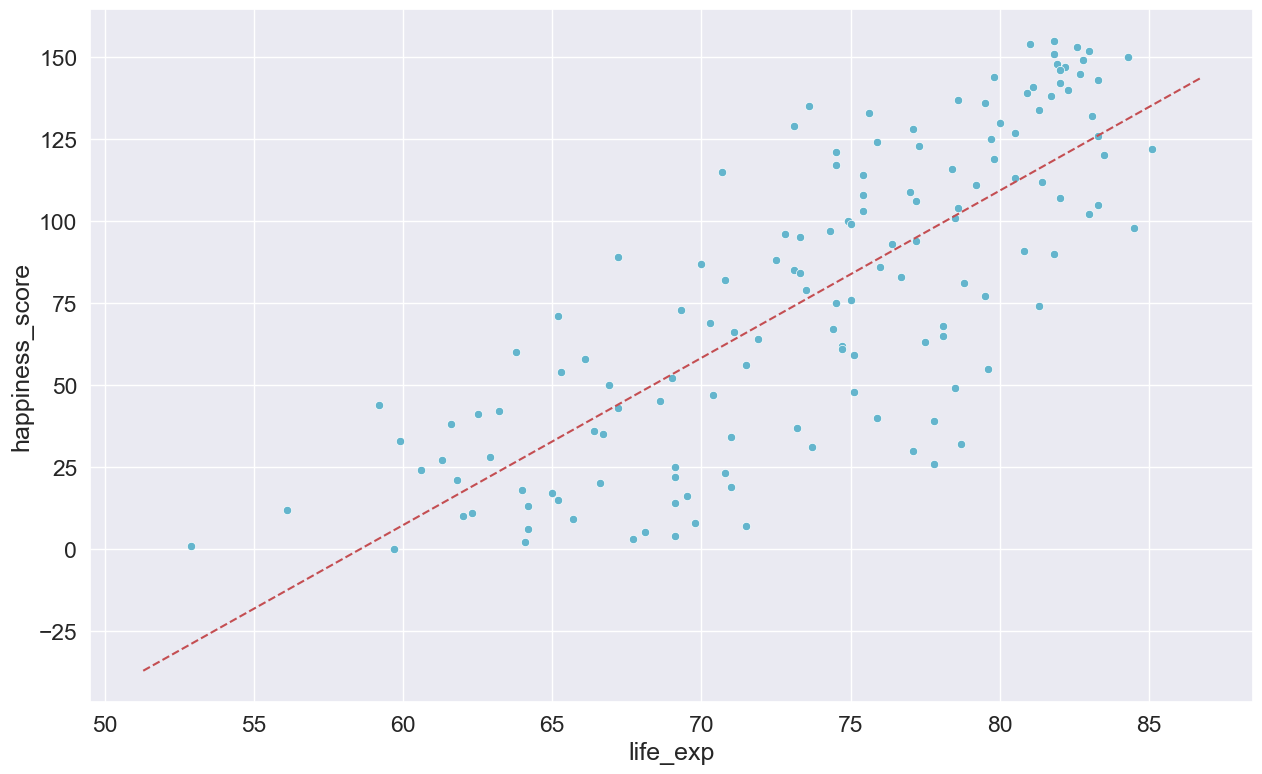

In [ ]:
### OPTIONAL
sns.scatterplot(x = 'life_exp', y = 'happiness_score', data = happy, color = 'c')
axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = results.params.const + results.params.life_exp * x_vals   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

5. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer.

In [79]:
# Define the y and X representing the target and the predictor variables
y = happy.happiness_score
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
# manually add a constant to the model
X = sm.add_constant(data = X)

# Import train_test_split package
from sklearn.model_selection import train_test_split

# Perform the split into 33% test and 66% train with parameter random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# define an OLS linear regression model and fit it to the training split
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           3.39e-29
Time:                        16:45:52   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
# define an OLS linear regression model and fit it to the test split
model = sm.OLS(y_test, X_test)
results_te = model.fit()
results_te.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     50.63
Date:                Thu, 12 Feb 2026   Prob (F-statistic):           1.01e-15
Time:                        16:38:45   Log-Likelihood:                -209.40
No. Observations:                  48   AIC:                             428.8
Df Residuals:                      43   BIC:                             438.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -145.6929     49.345     -2.953      0.005    -245.206     -46.180
social_support    -0.3854      0.102     -3.791      0.000      -0.590      -0.180
freedom           -0.2358      0.080     -2.933      0.005      -0.398      -0.074
generosity        -0.0066      0.082     -0.080      0.936      -0.172       0.159
life_exp           3.6815      0.589      6.252      0.000       2.494       4.869
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.814
Skew:                          -0.292   Prob(JB):                        0.404
Kurtosis:                       2.248   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
print(f"""By comparing the R-squared between tre train and test sets we have:
R-squared_train =   {results_tr.rsquared:.3f}
R-squared_test  =   {results_te.rsquared:.3f}
-> Since R-squared_test > R-squared_train, it means the model is defenetly not overfitting the the data""")

By comparing the R-squared between tre train and test sets we have:
R-squared_train =   0.785
R-squared_test  =   0.825
-> Since R-squared_test > R-squared_train, it means the model is defenetly not overfitting the the data


6. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [82]:
# Import mean_absolute_error package from sklearn
from sklearn.metrics import mean_absolute_error

# Generate prediction for both sets
y_tr_pred = model.predict(X_train)
y_te_pred = model.predict(X_test)

# MAE calculation for train and test sets
mae_train = mean_absolute_error(y_train, y_tr_pred)
mae_test = mean_absolute_error(y_test, y_te_pred)

# Print results
print(f"""MAE Train =   {mae_train}
MAE Test    =   {mae_test}""")


ValueError: shapes (95,5) and (95,5) not aligned: 5 (dim 1) != 95 (dim 0)

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?**